Importing numpy library

In [4]:
import numpy as np

Linear Regression Model

In [7]:
class Linear_Regression: 
    # initiating the parameters (learning rate & no_of_iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y) :

        # number of training examples (m) # number of features (n)

        self.m, self.n = X.shape # number of rows & columns 

        # initiating the weight and bias

        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing gradient descent 
        for i in range (self.no_of_iterations):
            self.update_weights ()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # calculate the gradient 

        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        

    def predict(self, X):

        return X.dot(self.w) + self.b

Using Linear Regression Model 

In [10]:
# importing the dependencies 

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [11]:
# data preprocessing 

data_linear = pd.read_csv("salary_data.csv")

In [12]:
data_linear.shape

(30, 2)

In [13]:
data_linear.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [14]:
data_linear.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [20]:
# spliting the feature and target

X = data_linear.iloc[:,:-1].values
Y = data_linear.iloc[:,1].values

In [22]:
print (X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [24]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [26]:
# spliting in to test and train

X_test, X_train, Y_test, Y_train = train_test_split (X, Y,  test_size= 0.33, random_state= 2  )

In [28]:
print (X.shape, X_train.shape, X_test.shape)

(30, 1) (10, 1) (20, 1)


In [30]:
# training the linear regression model 

model = Linear_Regression(learning_rate= 0.02, no_of_iterations= 10000)



In [32]:
model.fit ( X_train, Y_train)

In [34]:
# print the paremeter values

print( 'weight = ', model.w[0])
print('bias = ', model.b)

weight =  10105.30590017192
bias =  26368.413216248668


In [36]:
# predict the salary value for test data

test_data_prediction = model.predict(X_test)

In [38]:
print(test_data_prediction)

[ 55673.80032675 123379.3498579   66789.63681694  48600.08619663
  65779.10622692  77905.47330713 130453.06398802 117316.1663178
  79926.53448716  41526.37206651  58705.3920968  122368.81926788
 114284.57454774  85989.71802726  66789.63681694 106200.32982761
 132474.12516805  67800.16740695  75884.41212709  58705.3920968 ]


In [40]:
    print("Shape of X_test:", X_test.shape)
    print("Shape of Y_test:", Y_test.shape)

Shape of X_test: (20, 1)
Shape of Y_test: (20,)


In [218]:
# visualizing the predicted value and actual value 

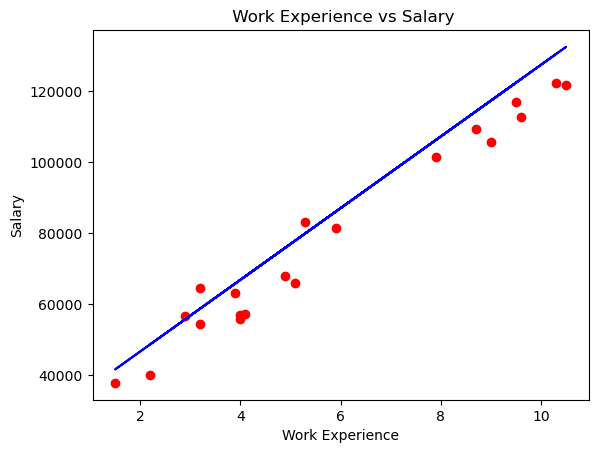

In [220]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title(' Work Experience vs Salary')
plt.show()
